# Linear Regression

🎯 In this exercise, you will model the performance of a NBA player's win rating (`win_rating`) according to their game statistics (like minutes played, `mp`). 

❓ Load the `NBA.csv` dataset into this notebook as a pandas dataframe, and display its first 5 rows.

In [6]:
import pandas as pd
nba = pd.read_csv('NBA.csv')

ℹ️ You can read a detailed description of the dataset in the challenge README. Make sure to refer to it throughout the challenge.

## 1. Define the feature set and target

🎯 The first objective is to model the players' overall performance rating compared to peers, called *Wins Above Replacement*, (`win_rating`) against the minutes that they've played (`mp`)

❓ Assign those two variables to `X` and `y`. Remember that `X` is the feature(s), and `y` the target.

In [7]:
X = nba[['mp']]
y = nba['win_rating']

👇 In a scatter plot ([doc](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html)) , visualize the relationship between the rating and the minutes played.

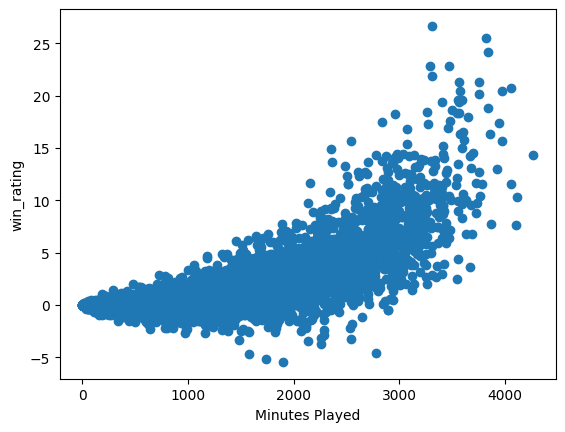

In [10]:
import matplotlib.pyplot as plt

# Plot Living area vs Sale price
plt.scatter(nba['mp'], nba['win_rating'])

# Labels
plt.xlabel("Minutes Played")
plt.ylabel("win_rating")

plt.show()

ℹ️ The scatter plot should hint that there is a relationship. But is it a perfectly linear relationship? 🤔 We'll see!

## 2. Cross-validation

👇 Using Sklearn's `cross_validate` ([doc](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html)), run a 5-fold cross validation on a `LinearRegression` ([doc](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)) model predicting the player performance rating from minutes played. Save the raw output of the cross validation under a new variable `cv_results`.

In [13]:
from sklearn.linear_model import LinearRegression

# Instanciate the model (💡 in Sklearn often called "estimator")
model = LinearRegression()

# Define X and y
X = nba[['mp']]
y = nba['win_rating']

# Train the model on the data
model.fit(X, y)

LinearRegression()

❓ What is the lowest score of the cross validation? Compute your answer and save the value under new variable `min_score`.

In [14]:
from sklearn.model_selection import cross_validate

# Instantiate model
model = LinearRegression()

# 5-Fold Cross validate model
cv_results = cross_validate(model, X, y, cv=5)

# Scores
cv_results['test_score']

# Mean of scores
cv_results['test_score'].mean()

0.556730180006891

❓ What is the highest score of the cross validation?  Compute your answer and save the value under new variable `max_score`.

In [19]:
max_score = cv_results['test_score'].max()
max_score
min_score = cv_results['test_score'].min()
min_score

{'fit_time': array([0.00367999, 0.00327301, 0.00219584, 0.00306582, 0.0036931 ]),
 'score_time': array([0.00239587, 0.00188899, 0.00139427, 0.00216603, 0.00253201]),
 'test_score': array([0.5555057 , 0.53447908, 0.53790391, 0.57658459, 0.57917762])}

❓ What is the mean score of the cross validation? Compute your answer and save the value under new variable `mean_score`.

In [28]:
min_score = cv_results['test_score'].min()
mean_score = cv_results['test_score'].mean()
mean_score

0.556730180006891

ℹ️ When running a cross-validation, we always look at the mean score as the most robust and representative evaluation of the model's performance.

### ☑️ Test your code

In [29]:
from nbresult import ChallengeResult

result = ChallengeResult('cv_results',
                         cv_result = cv_results,
                         mean_score = mean_score
)

result.write()
print(result.check())


============================= test session starts ==============================
platform darwin -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0 -- /Users/gidahuss/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /Users/gidahuss/code/gidahuss/data-linear-regression/tests
plugins: anyio-3.6.1
collecting ... collected 2 items

test_cv_results.py::TestCvResults::test_cv_mean PASSED                   [ 50%]
test_cv_results.py::TestCvResults::test_cv_results PASSED                [100%]

============================== 2 passed in 0.17s ===============================


💯 You can commit your code:

git add tests/cv_results.pickle

git commit -m 'Completed cv_results step'

git push origin master



❓ Plot the evolution of **<u>total</u> computational time (fitting and scoring)** and **<u>mean</u> score** as K folds increases from 2 until 20.

In [62]:
cv_results

kfolds = []
total_time = []
mean_scores = []
for k in range(2,21): 
  cv_results = cross_validate(model, X, y, cv=k)
  total_time.append(sum(cv_results['fit_time']+cv_results['score_time']))
  mean_scores.append(cv_results['test_score'].mean())
  kfolds.append(k)
 
total_time
kfolds
mean_scores

[0.5585953456775263,
 0.5586660529802963,
 0.5593666259668205,
 0.556730180006891,
 0.5585239978698054,
 0.5591598213023138,
 0.5592067633158935,
 0.5587039079067392,
 0.5568678806855818,
 0.5574423923917567,
 0.5597840270097336,
 0.5592188591410787,
 0.560203926449041,
 0.558316628931251,
 0.55920902727961,
 0.5594257624294945,
 0.559576056746282,
 0.556773505469385,
 0.5573895158123787]

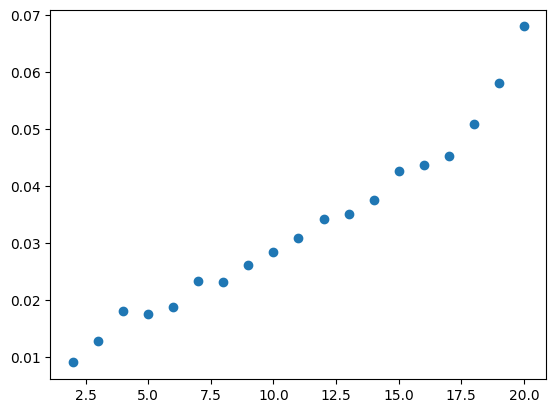

In [64]:
plt.scatter(kfolds,total_time)

(0.0, 1.0)

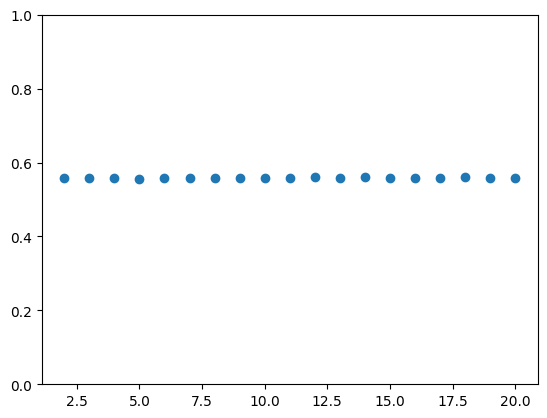

In [66]:
plt.scatter(kfolds,mean_scores)
plt.ylim(0,1)

ℹ️ You should see that the $R^2$ score stays stable, which is a good sign that the model performs equally on smaller and larger test sizes. Meanwhile, the computational time keeps increasing. For that reason, we do not exceed K = 10 as a rule of thumb.

## 3. Train the model

Cross validation does not train a model, it evaluates a hypothetical model on the dataset. If you want to use the model to, for example, make predictions, you will need to train it outside of the cross validation. 

❓ Go ahead and train the model on the full `X` and `y` (as we've already validated the model's score, and now will use it to predict!). Save the trained model under the variable `model`.

In [68]:
from sklearn.model_selection import train_test_split

# split the data into train and test
train_data, test_data = train_test_split(nba, test_size=0.3)

# Ready X's and y's
X_train = nba[['mp']]
y_train = nba['win_rating']

X_test = nba[['mp']]
y_test = nba['win_rating']

❓ What is the slope of your trained model? It can be accessed via the model's attributes. Save the slope under variable name `slope`.

In [95]:
model = LinearRegression()

# Train the model on the Training data
model.fit(X, y)

# Score the model on the Test data



0.5599048286723914

❓ What is the intercept of your trained model? It can be accessed via the model's attributes. Save the intercept under variable name `intercept`.

In [116]:
slope = model.coef_ 
slope =  0.0026

slope

0.0026

In [98]:
intercept = model.intercept_ 

-1.5463749371639444

🤔 Make sure you understand how to interpret these coefficients before moving on.

### ☑️ Test your code

In [117]:
from nbresult import ChallengeResult

result = ChallengeResult('trained_model',
                         slope = slope,
                         intercept = intercept
)

result.write()
print(result.check())


============================= test session starts ==============================
platform darwin -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0 -- /Users/gidahuss/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /Users/gidahuss/code/gidahuss/data-linear-regression/tests
plugins: anyio-3.6.1
collecting ... collected 2 items

test_trained_model.py::TestTrainedModel::test_intercept PASSED           [ 50%]
test_trained_model.py::TestTrainedModel::test_slope PASSED               [100%]

============================== 2 passed in 0.16s ===============================


💯 You can commit your code:

git add tests/trained_model.pickle

git commit -m 'Completed trained_model step'

git push origin master



## 4. Predict

❓ Use your trained model to predict the performance rating of a player who has played 1000 minutes in total. Save the predicted price in a variable called `prediction`.

In [119]:
prediction = model.predict([[1000]])

/Users/gidahuss/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


### ☑️ Test your code

In [120]:
from nbresult import ChallengeResult

result = ChallengeResult('prediction',
                         prediction = prediction
)

result.write()
print(result.check())


============================= test session starts ==============================
platform darwin -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0 -- /Users/gidahuss/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /Users/gidahuss/code/gidahuss/data-linear-regression/tests
plugins: anyio-3.6.1
collecting ... collected 1 item

test_prediction.py::TestPrediction::test_prediction PASSED               [100%]

============================== 1 passed in 0.15s ===============================


💯 You can commit your code:

git add tests/prediction.pickle

git commit -m 'Completed prediction step'

git push origin master



## 5. Improving the model with more features

Your friend who enjoys NBA fantasy league comes to you with some insights 🏀

They say that when evaluating a player's Wins Above Replacement rating, they would typically also look at the number of ball possessions (`poss`), their defense/offense ratio and their pacing.

❓ Visualize the correlation between these new features and the `win_rating`. You can use `matplotlib` or `seaborn`. Which **one** of the above features would you consider adding to your model?

NameError: name 'sns' is not defined

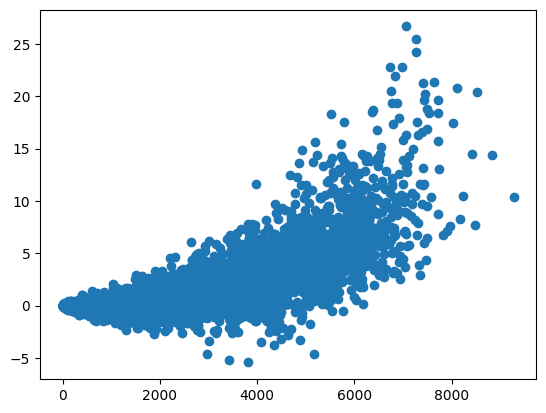

In [127]:
model = LinearRegression()
nba['poss']

# Define X and y
X1 = nba[['mp']]
X2 = nba[['poss']]
y = nba['win_rating']

# Train the model on the data
model.fit(X2, y)

plt.scatter(X2, y)
sns.regplot(X2, y)


<details>
    <summary>💡 Click here for a hint</summary>
    A seaborn <code>regplot</code> might be very handy here.
</details>

Now let's see if the model with two features (the new one you picked and `mp`) is better at predicting a player's rating than our first model.

❓ Create a new set of features - it should be a DataFrame with two columns.

/Users/gidahuss/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='poss', ylabel='win_rating'>

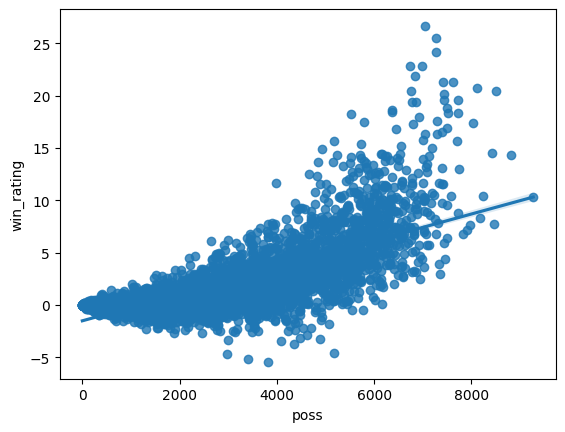

In [129]:
import seaborn as sns 
sns.regplot(X2, y)

sns.pairplot()

❓ Now cross-validate a new linear regression model and save the **mean** score to `mean_2_feat_score`.

> Note: if you only care about the cross-validation score, you can use sklearn's [`cross_val_score`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html)

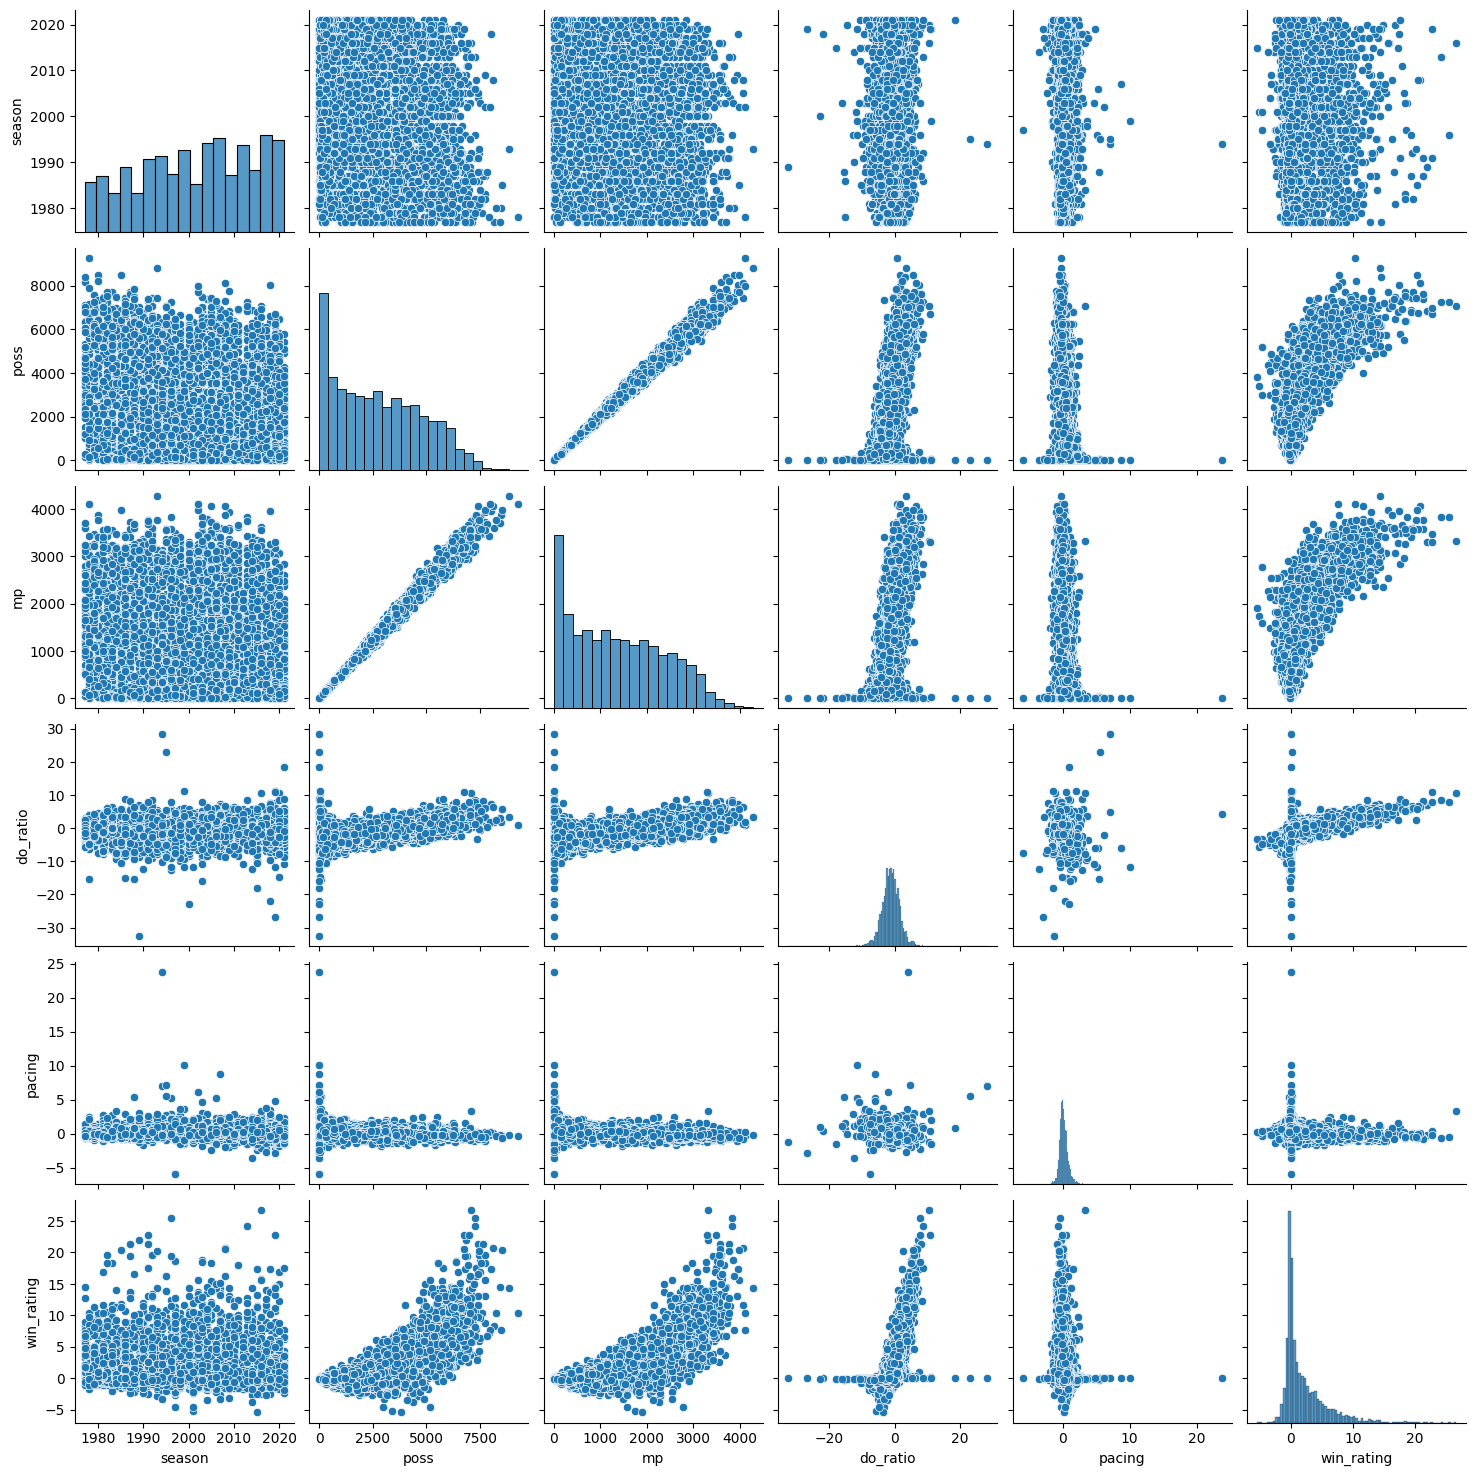

In [136]:
sns.pairplot(nba)

In [144]:
cv_results = cross_validate(model, X2, y, cv=5)
# mean_2_feat_score = cross_val_score(X2, y)

X3 = nba[['mp', 'do_ratio']]
cv_results = cross_validate(model, X3, y, cv=5)
mean_2_feat_score = cv_results['test_score'].mean()

### ☑️ Test your code

In [145]:
from nbresult import ChallengeResult

result = ChallengeResult('improved_score',
                         improved_score = mean_2_feat_score
)

result.write()
print(result.check())


============================= test session starts ==============================
platform darwin -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0 -- /Users/gidahuss/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /Users/gidahuss/code/gidahuss/data-linear-regression/tests
plugins: anyio-3.6.1
collecting ... collected 1 item

test_improved_score.py::TestImprovedScore::test_improved_score PASSED    [100%]

============================== 1 passed in 0.17s ===============================


💯 You can commit your code:

git add tests/improved_score.pickle

git commit -m 'Completed improved_score step'

git push origin master



You should see an **increase of around 8%** to your $R^2$ 👏

Congrats you just performed your first manual *feature selection* - we'll see more ways to do that this week!

🤔 But is this the best we can do with Linear Regression? Let's explore more in the next challenge!

# 🏁